#1. Feature Engineering

In [ ]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/march 17 orderbook.csv")
print(data)


                                          Time  BidPriceL20  BidQtyL20  \
0      2025-03-17 00:00:02.292235568 +0530 IST       605.56      8.213   
1      2025-03-17 00:00:03.292064236 +0530 IST       605.62      2.002   
2      2025-03-17 00:00:04.292280865 +0530 IST       605.67      1.254   
3       2025-03-17 00:00:05.29238442 +0530 IST       605.64      0.010   
4      2025-03-17 00:00:06.292346353 +0530 IST       605.64      0.010   
...                                        ...          ...        ...   
85490  2025-03-18 00:00:04.292194568 +0530 IST       627.39      5.669   
85491  2025-03-18 00:00:05.292363895 +0530 IST       627.45      8.615   
85492   2025-03-18 00:00:06.29225474 +0530 IST       627.45      8.615   
85493  2025-03-18 00:00:07.292648033 +0530 IST       627.45      8.615   
85494  2025-03-18 00:00:08.292464563 +0530 IST       627.47      3.643   

       BidPriceL19  BidQtyL19  BidPriceL18  BidQtyL18  BidPriceL17  BidQtyL17  \
0           605.58      4.847 

In [ ]:
data['B2A']=data['AskPriceL1']-data['BidPriceL1']
data['B2A']

,B2A
0,0.08
1,0.06
2,0.06
3,0.08
4,0.05
...,...
85490,0.08
85491,0.07
85492,0.07
85493,0.06


In [ ]:
data['imbalance_L1']=(data['BidQtyL1']-data['AskQtyL1'])/(data['BidQtyL1']+data['AskQtyL1'])
data['microprice']=(data['BidPriceL1']*data['AskQtyL1'] + data['AskPriceL1']*data['BidQtyL1'])/(data['BidQtyL1']+data['AskQtyL1'])
(data['imbalance_L1'])


,imbalance_L1
0,-0.314909
1,-0.470463
2,-0.279768
3,0.112172
4,0.000000
...,...
85490,-0.026627
85491,-0.013493
85492,-0.013493
85493,0.307377


In [ ]:
data['microprice']

,microprice
0,605.797404
1,605.845886
2,605.891607
3,605.924487
4,605.935000
...,...
85490,627.658935
85491,627.714528
85492,627.714528
85493,627.729221


In [ ]:
data['cum_bid_qty']=data['BidQtyL1']+data['BidQtyL2']+data['BidQtyL3']+data['BidQtyL4']+data['BidQtyL5']+data['BidQtyL6']+data['BidQtyL7']+data['BidQtyL8']+data['BidQtyL9']+data['BidQtyL10']+data['BidQtyL11']+data['BidQtyL12']+data['BidQtyL13']+data['BidQtyL14']+data['BidQtyL15']+data['BidQtyL16']+data['BidQtyL17']+data['BidQtyL18']+data['BidQtyL19']+data['BidQtyL20']
data['cum_ask_qty']=data['AskQtyL1']+data['AskQtyL2']+data['AskQtyL3']+data['AskQtyL4']+data['AskQtyL5']+data['AskQtyL6']+data['AskQtyL7']+data['AskQtyL8']+data['AskQtyL9']+data['AskQtyL10']+data['AskQtyL11']+data['AskQtyL12']+data['AskQtyL13']+data['AskQtyL14']+data['AskQtyL15']+data['AskQtyL16']+data['AskQtyL17']+data['AskQtyL18']+data['AskQtyL19']+data['AskQtyL20']
data['cum_volume']=data['cum_ask_qty']+data['cum_ask_qty']
data['cum_volume']

,cum_volume
0,84.548
1,93.092
2,90.512
3,75.022
4,91.136
...,...
85490,79.230
85491,91.270
85492,92.546
85493,107.804


In [ ]:
import numpy as np
data['mid_price']=(data['BidPriceL1']+data['AskPriceL1'])/2
data['rolling_midprice_return']=np.log(data['mid_price'] / data['mid_price'].shift(1))
data['rolling_midprice_return']

,rolling_midprice_return
0,NaN
1,0.000083
2,0.000066
3,0.000033
4,0.000025
...,...
85490,0.000104
85491,0.000088
85492,0.000000
85493,0.000008


In [ ]:
data['volatility_10s']=data['rolling_midprice_return'].rolling(window=10).std()
data['volatility_30s']=data['rolling_midprice_return'].rolling(window=30).std()
data['volatility_10s']

,volatility_10s
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
85490,0.000064
85491,0.000067
85492,0.000067
85493,0.000060


In [ ]:
data['volume_imbalance']=(data['cum_bid_qty']-data['cum_ask_qty'])/(data['cum_bid_qty']+data['cum_ask_qty'])
data['volume_imbalance']

,volume_imbalance
0,0.177749
1,-0.021350
2,-0.249838
3,0.286286
4,0.174328
...,...
85490,-0.030165
85491,-0.048514
85492,-0.055437
85493,-0.126455


CONVERTING THE TIME STAMP COLUMN TO A DESIRED FORMAT

In [ ]:
import pandas as pd
import re
# Clean and parse the timestamp column
def clean_timestamp(ts):
    ts = re.sub(r'\s+[A-Z]{2,}$', '', ts)                   # Remove "IST"
    ts = re.sub(r'\.(\d{6})\d+', r'.\1', ts)                 # Trim to microseconds
    return ts

data['Time'] = data['Time'].apply(clean_timestamp)
data['Time'] = pd.to_datetime(data['Time'], format="%Y-%m-%d %H:%M:%S.%f %z")
data['Time'] = data['Time'].dt.tz_convert("Asia/Kolkata")
data['Time'] = data['Time'].dt.floor('S')  # Align to exact seconds

# Check for and handle duplicate timestamps before reindexing
# Add a microsecond counter to differentiate duplicates
data['Time'] = data['Time'] + pd.to_timedelta(data.groupby('Time').cumcount(), unit='ms')

# Set index to Time
data = data.set_index('Time')

# Create full range of seconds
full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='S', tz='Asia/Kolkata')

# Reindex with full time range
data_full = data.reindex(full_range)

# Reset index and rename it back to Time
data = data_full.reset_index().rename(columns={'index': 'Time'})

# Done!

<ipython-input-30-f522d06c28a7>:12: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  data['Time'] = data['Time'].dt.floor('S')  # Align to exact seconds
<ipython-input-30-f522d06c28a7>:22: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='S', tz='Asia/Kolkata')


In [ ]:
data

,Time,BidPriceL20,BidQtyL20,BidPriceL19,BidQtyL19,BidPriceL18,BidQtyL18,BidPriceL17,BidQtyL17,BidPriceL16,...,imbalance_L1,microprice,cum_bid_qty,cum_ask_qty,cum_volume,mid_price,rolling_midprice_return,volatility_10s,volatility_30s,volume_imbalance
0,2025-03-17 00:00:02+05:30,605.56,8.213,605.58,4.847,605.59,0.013,605.60,4.941,605.61,...,-0.314909,605.797404,60.551,42.274,84.548,605.810,NaN,NaN,NaN,0.177749
1,2025-03-17 00:00:03+05:30,605.62,2.002,605.63,1.460,605.64,0.010,605.65,13.127,605.66,...,-0.470463,605.845886,44.600,46.546,93.092,605.860,0.000083,NaN,NaN,-0.021350
2,2025-03-17 00:00:04+05:30,605.67,1.254,605.68,0.049,605.69,0.661,605.70,9.493,605.71,...,-0.279768,605.891607,27.163,45.256,90.512,605.900,0.000066,NaN,NaN,-0.249838
3,2025-03-17 00:00:05+05:30,605.64,0.010,605.65,12.466,605.66,8.213,605.67,7.542,605.68,...,0.112172,605.924487,67.604,37.511,75.022,605.920,0.000033,NaN,NaN,0.286286
4,2025-03-17 00:00:06+05:30,605.64,0.010,605.65,0.013,605.66,8.213,605.67,1.335,605.68,...,0.000000,605.935000,64.810,45.568,91.136,605.935,0.000025,NaN,NaN,0.174328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86402,2025-03-18 00:00:04+05:30,627.39,5.669,627.40,0.815,627.41,1.288,627.42,0.439,627.43,...,-0.026627,627.658935,37.295,39.615,79.230,627.660,0.000104,0.000064,0.000052,-0.030165
86403,2025-03-18 00:00:05+05:30,627.45,8.615,627.46,3.528,627.47,3.643,627.49,1.289,627.50,...,-0.013493,627.714528,41.412,45.635,91.270,627.715,0.000088,0.000067,0.000054,-0.048514
86404,2025-03-18 00:00:06+05:30,627.45,8.615,627.46,3.528,627.47,3.643,627.49,1.289,627.50,...,-0.013493,627.714528,41.412,46.273,92.546,627.715,0.000000,0.000067,0.000054,-0.055437
86405,2025-03-18 00:00:07+05:30,627.45,8.615,627.46,3.528,627.47,3.722,627.49,1.289,627.50,...,0.307377,627.729221,41.800,53.902,107.804,627.720,0.000008,0.000060,0.000054,-0.126455


In [ ]:
data2=pd.read_csv("/content/drive/MyDrive/march 17 aggtrade.csv")
data2

,Time,Price,Quantity,IsMarketMaker,NumTrades,M
0,2025-03-17 00:00:04.943335783 +0530 IST,605.94,0.890,False,1,True
1,2025-03-17 00:00:04.945244303 +0530 IST,605.94,0.149,False,1,True
2,2025-03-17 00:00:04.952959268 +0530 IST,605.95,0.013,False,1,True
3,2025-03-17 00:00:09.096707644 +0530 IST,605.93,0.417,False,1,True
4,2025-03-17 00:00:09.982116115 +0530 IST,605.94,0.372,False,1,True
...,...,...,...,...,...,...
302118,2025-03-17 23:59:51.119276292 +0530 IST,627.57,0.055,False,1,True
302119,2025-03-17 23:59:51.122235073 +0530 IST,627.59,0.046,False,2,True
302120,2025-03-17 23:59:51.132874809 +0530 IST,627.60,4.597,False,5,True
302121,2025-03-17 23:59:51.142361996 +0530 IST,627.59,0.329,False,1,True


RESIZING THE AGGTRADE DATA FRAME ACCORDINGLY TO INCORPORATE INTO THE MAIN DATA

In [ ]:
import pandas as pd
import re


# Clean and parse timestamps
def clean_timestamp(ts):
    ts = re.sub(r'\s+[A-Z]{2,}$', '', ts)                    # Remove "IST"
    ts = re.sub(r'\.(\d{6})\d+', r'.\1', ts)                  # Truncate nanoseconds to microseconds
    return ts

data2['Time'] = data2['Time'].apply(clean_timestamp)
data2['Time'] = pd.to_datetime(data2['Time'], format='%Y-%m-%d %H:%M:%S.%f %z')
data2['Time'] = data2['Time'].dt.tz_convert('Asia/Kolkata')        # Convert to IST if needed
data2['Time_rounded'] = data2['Time'].dt.floor('S')                # Round to second

# Group and aggregate
agg_data2 = data2.groupby('Time_rounded').agg({
    'Price': 'mean',
    'Quantity': 'sum',
    'NumTrades': 'sum',
    'IsMarketMaker': 'any',  # Logical OR
    'M': 'any'               # Logical OR
}).reset_index()

<ipython-input-33-f5523e227ec6>:14: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  data2['Time_rounded'] = data2['Time'].dt.floor('S')                # Round to second


In [ ]:
# Rename columns (optional)
agg_data2.columns = ['Time', 'AvgPrice', 'TotalQuantity', 'TotalTrades', 'IsMarketMaker', 'M']

# Preview
data2=agg_data2

In [ ]:
import pandas as pd

# Assuming `data2` is your grouped DataFrame from earlier:
# Ensure the time column is datetime and timezone-aware
data2['Time'] = pd.to_datetime(data2['Time'])

# Generate a complete range of seconds for that day
start = data2['Time'].min()
end = data2['Time'].max()
full_range = pd.date_range(start=start, end=end, freq='S', tz='Asia/Kolkata')

# Reindex your dataframe on this full range
data2 = data2.set_index('Time').reindex(full_range)

# Reset index and rename back to 'Time'
data2 = data2.reset_index().rename(columns={'index': 'Time'})

# Fill in defaults for missing rows
data2['TotalQuantity'] = data2['TotalQuantity'].fillna(0)
data2['TotalTrades'] = data2['TotalTrades'].fillna(0)

# Columns to keep as NaN: AvgPrice, AnyMarketMaker, AnyM

# Optional: sort by time
data2 = data2.sort_values('Time')



<ipython-input-35-2ec3773c4419>:10: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  full_range = pd.date_range(start=start, end=end, freq='S', tz='Asia/Kolkata')


In [ ]:
data2 = data2.drop(data2.index[-1])
data2

,Time,AvgPrice,TotalQuantity,TotalTrades,IsMarketMaker,M
0,2025-03-17 00:00:04+05:30,605.943333,1.052,3.0,False,True
1,2025-03-17 00:00:05+05:30,NaN,0.000,0.0,NaN,NaN
2,2025-03-17 00:00:06+05:30,NaN,0.000,0.0,NaN,NaN
3,2025-03-17 00:00:07+05:30,NaN,0.000,0.0,NaN,NaN
4,2025-03-17 00:00:08+05:30,NaN,0.000,0.0,NaN,NaN
...,...,...,...,...,...,...
86389,2025-03-17 23:59:53+05:30,NaN,0.000,0.0,NaN,NaN
86390,2025-03-17 23:59:54+05:30,NaN,0.000,0.0,NaN,NaN
86391,2025-03-17 23:59:55+05:30,NaN,0.000,0.0,NaN,NaN
86392,2025-03-17 23:59:56+05:30,NaN,0.000,0.0,NaN,NaN


CLUBBING THE DATA FROM TRADEBOOK AND AGGTRADE

In [ ]:
data[['Price','Quantity','TotalTrades','IsMarketMaker','M']] = data2[['AvgPrice','TotalQuantity','TotalTrades','IsMarketMaker','M']]
data

,Time,BidPriceL20,BidQtyL20,BidPriceL19,BidQtyL19,BidPriceL18,BidQtyL18,BidPriceL17,BidQtyL17,BidPriceL16,...,mid_price,rolling_midprice_return,volatility_10s,volatility_30s,volume_imbalance,Price,Quantity,TotalTrades,IsMarketMaker,M
0,2025-03-17 00:00:02+05:30,605.56,8.213,605.58,4.847,605.59,0.013,605.60,4.941,605.61,...,605.810,NaN,NaN,NaN,0.177749,605.943333,1.052,3.0,False,True
1,2025-03-17 00:00:03+05:30,605.62,2.002,605.63,1.460,605.64,0.010,605.65,13.127,605.66,...,605.860,0.000083,NaN,NaN,-0.021350,NaN,0.000,0.0,NaN,NaN
2,2025-03-17 00:00:04+05:30,605.67,1.254,605.68,0.049,605.69,0.661,605.70,9.493,605.71,...,605.900,0.000066,NaN,NaN,-0.249838,NaN,0.000,0.0,NaN,NaN
3,2025-03-17 00:00:05+05:30,605.64,0.010,605.65,12.466,605.66,8.213,605.67,7.542,605.68,...,605.920,0.000033,NaN,NaN,0.286286,NaN,0.000,0.0,NaN,NaN
4,2025-03-17 00:00:06+05:30,605.64,0.010,605.65,0.013,605.66,8.213,605.67,1.335,605.68,...,605.935,0.000025,NaN,NaN,0.174328,NaN,0.000,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86402,2025-03-18 00:00:04+05:30,627.39,5.669,627.40,0.815,627.41,1.288,627.42,0.439,627.43,...,627.660,0.000104,0.000064,0.000052,-0.030165,NaN,NaN,NaN,NaN,NaN
86403,2025-03-18 00:00:05+05:30,627.45,8.615,627.46,3.528,627.47,3.643,627.49,1.289,627.50,...,627.715,0.000088,0.000067,0.000054,-0.048514,NaN,NaN,NaN,NaN,NaN
86404,2025-03-18 00:00:06+05:30,627.45,8.615,627.46,3.528,627.47,3.643,627.49,1.289,627.50,...,627.715,0.000000,0.000067,0.000054,-0.055437,NaN,NaN,NaN,NaN,NaN
86405,2025-03-18 00:00:07+05:30,627.45,8.615,627.46,3.528,627.47,3.722,627.49,1.289,627.50,...,627.720,0.000008,0.000060,0.000054,-0.126455,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Assuming 'data' is your DataFrame and 'TotalQuantity' represents volume per second
data['Cumulative_Volume_10s'] = data['Quantity'].rolling(window=10).sum()
data['Cumulative_Volume_30s'] = data['Quantity'].rolling(window=30).sum()
data['Cumulative_Volume_10s']

,Cumulative_Volume_10s
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
86402,NaN
86403,NaN
86404,NaN
86405,NaN


In [ ]:
# Calculate VWAP
data['VWAP'] = (data['Price'] * data['Quantity']).cumsum() / data['Quantity'].cumsum()

# Calculate change in VWAP for 10 seconds and 30 seconds
data['VWAP_Change_10s'] = data['VWAP'].diff(periods=10)
data['VWAP_Change_30s'] = data['VWAP'].diff(periods=30)

# Display the updated DataFrame
data['VWAP_Change_10s']

,VWAP_Change_10s
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
86402,NaN
86403,NaN
86404,NaN
86405,NaN


In [ ]:
def compute_slope(prices, volumes, side='ask'):
    slopes = []
    base_price = prices[0]  # Best price at level 1
    cum_volume = 0.0

    for i in range(1, len(prices)):
        cum_volume += volumes[i]
        if cum_volume > 0:
            if side == 'ask':
                slope = (prices[i] - base_price) / cum_volume
            else:
                slope = (base_price - prices[i]) / cum_volume
            slopes.append(slope)

    return sum(slopes) / len(slopes) if slopes else 0

def compute_sloped_depth(data, levels=20):
    sloped_bid = []
    sloped_ask = []

    for _, row in data.iterrows():
        # Updated to use existing column names from your DataFrame
        bid_prices = [row[f'BidPriceL{i}'] for i in range(1, levels + 1)]
        bid_volumes = [row[f'BidQtyL{i}'] for i in range(1, levels + 1)]
        ask_prices = [row[f'AskPriceL{i}'] for i in range(1, levels + 1)]
        ask_volumes = [row[f'AskQtyL{i}'] for i in range(1, levels + 1)]

        bid_slope = compute_slope(bid_prices, bid_volumes, side='bid')
        ask_slope = compute_slope(ask_prices, ask_volumes, side='ask')

        sloped_bid.append(bid_slope)
        sloped_ask.append(ask_slope)

    data['sloped_bid'] = sloped_bid
    data['sloped_ask'] = sloped_ask
    return data


data = compute_sloped_depth(data, levels=20)

In [ ]:
data['sloped_bid']

,sloped_bid
0,0.005461
1,0.017786
2,0.016183
3,0.008830
4,0.014629
...,...
86402,0.011787
86403,0.018293
86404,0.018293
86405,0.018716


In [ ]:
data

,Time,BidPriceL20,BidQtyL20,BidPriceL19,BidQtyL19,BidPriceL18,BidQtyL18,BidPriceL17,BidQtyL17,BidPriceL16,...,TotalTrades,IsMarketMaker,M,Cumulative_Volume_10s,Cumulative_Volume_30s,VWAP,VWAP_Change_10s,VWAP_Change_30s,sloped_bid,sloped_ask
0,2025-03-17 00:00:02+05:30,605.56,8.213,605.58,4.847,605.59,0.013,605.60,4.941,605.61,...,3.0,False,True,NaN,NaN,605.943333,NaN,NaN,0.005461,0.010071
1,2025-03-17 00:00:03+05:30,605.62,2.002,605.63,1.460,605.64,0.010,605.65,13.127,605.66,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017786,0.008568
2,2025-03-17 00:00:04+05:30,605.67,1.254,605.68,0.049,605.69,0.661,605.70,9.493,605.71,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016183,0.004877
3,2025-03-17 00:00:05+05:30,605.64,0.010,605.65,12.466,605.66,8.213,605.67,7.542,605.68,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008830,0.010123
4,2025-03-17 00:00:06+05:30,605.64,0.010,605.65,0.013,605.66,8.213,605.67,1.335,605.68,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014629,0.008606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86402,2025-03-18 00:00:04+05:30,627.39,5.669,627.40,0.815,627.41,1.288,627.42,0.439,627.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011787,0.070039
86403,2025-03-18 00:00:05+05:30,627.45,8.615,627.46,3.528,627.47,3.643,627.49,1.289,627.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.018293,0.006560
86404,2025-03-18 00:00:06+05:30,627.45,8.615,627.46,3.528,627.47,3.643,627.49,1.289,627.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.018293,0.006556
86405,2025-03-18 00:00:07+05:30,627.45,8.615,627.46,3.528,627.47,3.722,627.49,1.289,627.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.018716,0.005646


In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame and it has 'Quantity' for trade volume
# and 'Time' as a datetime index


# 1. Define a Function to Calculate Trade Wipe Level:
def calculate_trade_wipe_level(row, window_size):
    """Calculates trade wipe level for a given row and window size.

    Args:
        row (pd.Series): A row of the DataFrame.
        window_size (int): The window size (10 or 30 seconds).

    Returns:
        float: The trade wipe level.
    """
    # Cumulative volume for the window
    cumulative_volume = row[f'Cumulative_Volume_{window_size}s']

    # Total order book volume (bid + ask) for that timestamp
    total_order_book_volume = row['cum_bid_qty'] + row['cum_ask_qty']

    # If total_order_book_volume is zero return zero
    if total_order_book_volume == 0:
        return 0.0
    else:
        # Calculate trade wipe level
        return cumulative_volume / total_order_book_volume

# 2. Apply the Function to Calculate Trade Wipe Levels:
data['TradeWipeLevel_10s'] = data.apply(calculate_trade_wipe_level, axis=1, args=(10,))
data['TradeWipeLevel_30s'] = data.apply(calculate_trade_wipe_level, axis=1, args=(30,))

# 3. Calculate Average Trade Wipe Levels:
avg_trade_wipe_10s = data['TradeWipeLevel_10s'].mean()
avg_trade_wipe_30s = data['TradeWipeLevel_30s'].mean()



In [ ]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data

,Time,BidPriceL20,BidQtyL20,BidPriceL19,BidQtyL19,BidPriceL18,BidQtyL18,BidPriceL17,BidQtyL17,BidPriceL16,...,M,Cumulative_Volume_10s,Cumulative_Volume_30s,VWAP,VWAP_Change_10s,VWAP_Change_30s,sloped_bid,sloped_ask,TradeWipeLevel_10s,TradeWipeLevel_30s
0,2025-03-17 00:00:41+05:30,606.05,10.204,606.06,3.437,606.07,0.013,606.10,8.094,606.11,...,True,34.480,82.188,606.197146,5.690548e-02,2.568014e-01,0.006103,0.013767,0.197826,0.471545
1,2025-03-17 00:00:50+05:30,605.92,3.770,605.93,8.874,605.94,3.773,605.95,8.226,605.96,...,True,23.438,79.652,606.196058,1.250528e-02,1.792807e-01,0.012106,0.013109,0.144393,0.490707
2,2025-03-17 00:00:54+05:30,605.93,8.213,605.94,3.773,605.95,8.886,605.96,0.593,605.97,...,True,2.247,77.745,606.196003,-4.054123e-04,1.839050e-01,0.013933,0.009786,0.013687,0.473547
3,2025-03-17 00:01:00+05:30,605.77,14.013,605.78,0.025,605.79,6.611,605.80,0.825,605.81,...,True,9.396,46.927,606.185658,-1.040009e-02,4.543423e-02,0.055593,0.015022,0.097133,0.485119
4,2025-03-17 00:01:01+05:30,605.81,0.011,605.82,1.991,605.83,1.440,605.85,1.176,605.86,...,True,9.958,48.510,606.183086,-1.284333e-02,4.284497e-02,0.009672,0.017037,0.132984,0.647828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14445,2025-03-17 23:58:44+05:30,626.72,2.160,626.73,3.740,626.74,1.263,626.75,0.395,626.76,...,True,4.827,16.566,627.136542,-2.650929e-06,-8.767413e-06,0.011403,0.016378,0.053171,0.182481
14446,2025-03-17 23:58:59+05:30,626.91,2.914,626.93,0.616,626.94,6.287,626.96,7.832,626.97,...,True,3.306,12.418,627.136543,8.330364e-07,-4.781501e-06,0.017905,0.037391,0.033724,0.126676
14447,2025-03-17 23:59:02+05:30,627.00,0.815,627.01,7.820,627.02,2.654,627.04,1.254,627.05,...,True,6.324,16.903,627.136544,1.118608e-06,-3.591006e-06,0.014701,0.010395,0.096240,0.257232
14448,2025-03-17 23:59:10+05:30,626.99,7.994,627.00,3.417,627.01,8.458,627.02,4.577,627.04,...,True,5.112,12.742,627.136544,8.082078e-07,5.615399e-07,0.011558,0.009101,0.060295,0.150290


In [ ]:
data.to_csv('/content/drive/My Drive/day4.csv', index=False)

In [ ]:
import pandas as pd
day1=pd.read_csv("/content/drive/MyDrive/day1.csv")
day2=pd.read_csv("/content/drive/MyDrive/day2.csv")
day3=pd.read_csv("/content/drive/MyDrive/day3.csv")
day4=pd.read_csv("/content/drive/MyDrive/day4.csv")


COMBINING DATA FROM ALL 4 DAYS

In [ ]:
import pandas as pd

# Assuming you have your DataFrames: day1, day2, day3, day4

# 1. Concatenate DataFrames:
combined_data = pd.concat([day1, day2, day3, day4], ignore_index=True)
combined_data=combined_data.reset_index(drop=True)

print(combined_data)

                            Time  BidPriceL20  BidQtyL20  BidPriceL19  \
0      2025-03-14 00:00:34+05:30       578.61      0.735       578.64   
1      2025-03-14 00:00:38+05:30       578.52      5.773       578.53   
2      2025-03-14 00:00:41+05:30       578.52      5.773       578.53   
3      2025-03-14 00:00:42+05:30       578.50      7.687       578.51   
4      2025-03-14 00:00:48+05:30       578.48      0.085       578.49   
...                          ...          ...        ...          ...   
44283  2025-03-17 23:58:44+05:30       626.72      2.160       626.73   
44284  2025-03-17 23:58:59+05:30       626.91      2.914       626.93   
44285  2025-03-17 23:59:02+05:30       627.00      0.815       627.01   
44286  2025-03-17 23:59:10+05:30       626.99      7.994       627.00   
44287  2025-03-17 23:59:13+05:30       626.96      7.832       626.97   

       BidQtyL19  BidPriceL18  BidQtyL18  BidPriceL17  BidQtyL17  BidPriceL16  \
0          0.025       578.65      2.717  

In [ ]:
for i in range(2, 21):  # Loop from level 2 to 20
    combined_data[f'imbalance_L{i}'] = (combined_data[f'BidQtyL{i}'] - combined_data[f'AskQtyL{i}']) / (combined_data[f'BidQtyL{i}'] + combined_data[f'AskQtyL{i}'])

# Now combined_data contains the imbalance features for all levels
combined_data

,Time,BidPriceL20,BidQtyL20,BidPriceL19,BidQtyL19,BidPriceL18,BidQtyL18,BidPriceL17,BidQtyL17,BidPriceL16,...,imbalance_L11,imbalance_L12,imbalance_L13,imbalance_L14,imbalance_L15,imbalance_L16,imbalance_L17,imbalance_L18,imbalance_L19,imbalance_L20
0,2025-03-14 00:00:34+05:30,578.61,0.735,578.64,0.025,578.65,2.717,578.66,0.628,578.67,...,0.852137,0.054825,-0.427848,-0.957185,-0.756509,0.285999,0.959438,0.990476,-0.746193,-0.814347
1,2025-03-14 00:00:38+05:30,578.52,5.773,578.53,2.717,578.54,0.013,578.55,9.385,578.56,...,0.219842,-0.382724,-0.037727,0.980168,0.803198,-0.666907,0.899605,0.000000,0.145930,0.383086
2,2025-03-14 00:00:41+05:30,578.52,5.773,578.53,2.717,578.54,0.013,578.55,9.890,578.56,...,-0.667239,-0.088831,0.994842,0.945337,0.466780,0.164983,0.997375,-0.987242,0.026833,-0.195793
3,2025-03-14 00:00:42+05:30,578.50,7.687,578.51,9.130,578.52,4.905,578.53,2.717,578.54,...,0.300737,-0.275305,0.371931,0.000000,-0.038265,-0.995050,0.587960,0.967904,0.450012,0.878773
4,2025-03-14 00:00:48+05:30,578.48,0.085,578.49,0.013,578.50,7.687,578.51,9.130,578.52,...,0.011414,-0.670241,0.869212,-0.997568,-0.317079,0.748663,0.982628,0.378834,-0.948919,0.734694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44283,2025-03-17 23:58:44+05:30,626.72,2.160,626.73,3.740,626.74,1.263,626.75,0.395,626.76,...,0.231559,0.983618,0.180226,-0.092678,0.780257,-0.692090,0.955446,-0.207156,0.984085,-0.160023
44284,2025-03-17 23:58:59+05:30,626.91,2.914,626.93,0.616,626.94,6.287,626.96,7.832,626.97,...,-0.574099,-0.522318,0.489216,-0.811777,-0.490181,0.725118,0.933827,0.997141,-0.015974,0.204879
44285,2025-03-17 23:59:02+05:30,627.00,0.815,627.01,7.820,627.02,2.654,627.04,1.254,627.05,...,-0.706790,0.632162,0.538851,0.402409,0.501757,-0.883681,0.985748,0.613374,0.605255,0.827354
44286,2025-03-17 23:59:10+05:30,626.99,7.994,627.00,3.417,627.01,8.458,627.02,4.577,627.04,...,-0.266380,-0.997166,0.349680,-0.055418,-0.497678,0.325581,0.889370,0.997874,0.685327,0.852607


In [ ]:
def determine_trade_direction(row):
    # Change 'price' to 'Price' or the correct column name
    trade_price = row['Price']  # Or row['AvgPrice'] if that's the correct column

    # Directly access bid and ask prices from columns
    best_bid = row['BidPriceL1']
    best_ask = row['AskPriceL1']

    if trade_price >= best_ask:
        return 1
    elif trade_price <= best_bid:
        return -1
    else:
        return 0

combined_data['trade_direction'] = combined_data.apply(determine_trade_direction, axis=1)

In [ ]:
combined_data['trade_direction']

,trade_direction
0,-1
1,0
2,0
3,-1
4,0
...,...
44283,0
44284,1
44285,-1
44286,-1


In [ ]:
combined_data

,Time,BidPriceL20,BidQtyL20,BidPriceL19,BidQtyL19,BidPriceL18,BidQtyL18,BidPriceL17,BidQtyL17,BidPriceL16,...,imbalance_L12,imbalance_L13,imbalance_L14,imbalance_L15,imbalance_L16,imbalance_L17,imbalance_L18,imbalance_L19,imbalance_L20,trade_direction
0,2025-03-14 00:00:34+05:30,578.61,0.735,578.64,0.025,578.65,2.717,578.66,0.628,578.67,...,0.054825,-0.427848,-0.957185,-0.756509,0.285999,0.959438,0.990476,-0.746193,-0.814347,-1
1,2025-03-14 00:00:38+05:30,578.52,5.773,578.53,2.717,578.54,0.013,578.55,9.385,578.56,...,-0.382724,-0.037727,0.980168,0.803198,-0.666907,0.899605,0.000000,0.145930,0.383086,0
2,2025-03-14 00:00:41+05:30,578.52,5.773,578.53,2.717,578.54,0.013,578.55,9.890,578.56,...,-0.088831,0.994842,0.945337,0.466780,0.164983,0.997375,-0.987242,0.026833,-0.195793,0
3,2025-03-14 00:00:42+05:30,578.50,7.687,578.51,9.130,578.52,4.905,578.53,2.717,578.54,...,-0.275305,0.371931,0.000000,-0.038265,-0.995050,0.587960,0.967904,0.450012,0.878773,-1
4,2025-03-14 00:00:48+05:30,578.48,0.085,578.49,0.013,578.50,7.687,578.51,9.130,578.52,...,-0.670241,0.869212,-0.997568,-0.317079,0.748663,0.982628,0.378834,-0.948919,0.734694,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44283,2025-03-17 23:58:44+05:30,626.72,2.160,626.73,3.740,626.74,1.263,626.75,0.395,626.76,...,0.983618,0.180226,-0.092678,0.780257,-0.692090,0.955446,-0.207156,0.984085,-0.160023,0
44284,2025-03-17 23:58:59+05:30,626.91,2.914,626.93,0.616,626.94,6.287,626.96,7.832,626.97,...,-0.522318,0.489216,-0.811777,-0.490181,0.725118,0.933827,0.997141,-0.015974,0.204879,1
44285,2025-03-17 23:59:02+05:30,627.00,0.815,627.01,7.820,627.02,2.654,627.04,1.254,627.05,...,0.632162,0.538851,0.402409,0.501757,-0.883681,0.985748,0.613374,0.605255,0.827354,-1
44286,2025-03-17 23:59:10+05:30,626.99,7.994,627.00,3.417,627.01,8.458,627.02,4.577,627.04,...,-0.997166,0.349680,-0.055418,-0.497678,0.325581,0.889370,0.997874,0.685327,0.852607,-1



#2. Data Normalization

NORMALIZING USING Z_SCORE


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select the 125 feature columns
features = combined_data.iloc[:, 1 :]

# Apply Z-score normalization
scaler = StandardScaler()
z_normalized = scaler.fit_transform(features)

# Convert to DataFrame
normalized_combined_data = pd.DataFrame(z_normalized, columns=features.columns)
normalized_combined_data['Time'] = combined_data['Time']
normalized_combined_data['trade_direction'] = combined_data['trade_direction']

print(normalized_combined_data.head())


   BidPriceL20  BidQtyL20  BidPriceL19  BidQtyL19  BidPriceL18  BidQtyL18  \
0    -1.125273  -0.134845    -1.124426  -0.182239    -1.124539  -0.069275   
1    -1.129636   0.033272    -1.129759  -0.076683    -1.129873  -0.160378   
2    -1.129636   0.033272    -1.129759  -0.076683    -1.129873  -0.160378   
3    -1.130606   0.097141    -1.130729   0.174775    -1.130842   0.004443   
4    -1.131576  -0.156535    -1.131698  -0.182709    -1.131812   0.098174   

   BidPriceL17  BidQtyL17  BidPriceL16  BidQtyL16  ...  imbalance_L13  \
0    -1.124652  -0.131151    -1.124756  -0.021855  ...      -0.691496   
1    -1.129985   0.161200    -1.130089  -0.117116  ...      -0.069097   
2    -1.129985   0.178060    -1.130089  -0.117116  ...       1.578259   
3    -1.130955  -0.061410    -1.131059  -0.137430  ...       0.584469   
4    -1.131924   0.152687    -1.132029   0.008931  ...       1.377829   

   imbalance_L14  imbalance_L15  imbalance_L16  imbalance_L17  imbalance_L18  \
0      -1.531536  

In [ ]:
# Assuming your DataFrame is named 'normalized_combined_data'
cols = ['Time'] + [col for col in normalized_combined_data if col != 'Time']
normalized_combined_data = normalized_combined_data[cols]
normalized_combined_data

,Time,BidPriceL20,BidQtyL20,BidPriceL19,BidQtyL19,BidPriceL18,BidQtyL18,BidPriceL17,BidQtyL17,BidPriceL16,...,imbalance_L12,imbalance_L13,imbalance_L14,imbalance_L15,imbalance_L16,imbalance_L17,imbalance_L18,imbalance_L19,imbalance_L20,trade_direction
0,2025-03-14 00:00:34+05:30,-1.125273,-0.134845,-1.124426,-0.182239,-1.124539,-0.069275,-1.124652,-0.131151,-1.124756,...,0.098687,-0.691496,-1.531536,-1.200536,0.408297,1.406927,1.435817,-1.141307,-1.222800,-1
1,2025-03-14 00:00:38+05:30,-1.129636,0.033272,-1.129759,-0.076683,-1.129873,-0.160378,-1.129985,0.161200,-1.130089,...,-0.612117,-0.069097,1.527025,1.226465,-1.047856,1.316665,-0.042509,0.173267,0.521028,0
2,2025-03-14 00:00:41+05:30,-1.129636,0.033272,-1.129759,-0.076683,-1.129873,-0.160378,-1.129985,0.178060,-1.130089,...,-0.134683,1.578259,1.472036,0.702978,0.223371,1.464156,-1.516008,-0.002226,-0.321996,0
3,2025-03-14 00:00:42+05:30,-1.130606,0.097141,-1.130729,0.174775,-1.130842,0.004443,-1.130955,-0.061410,-1.131059,...,-0.437612,0.584469,-0.020397,-0.082903,-1.549298,0.846531,1.402126,0.621342,1.242900,-1
4,2025-03-14 00:00:48+05:30,-1.131576,-0.156535,-1.131698,-0.182709,-1.131812,0.098174,-1.131924,0.152687,-1.132029,...,-1.079192,1.377829,-1.595289,-0.516755,1.115303,1.441909,0.522916,-1.440031,1.033077,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44283,2025-03-17 23:58:44+05:30,1.207281,-0.087293,1.207167,-0.036571,1.207060,-0.118263,1.206954,-0.138930,1.206852,...,1.607525,0.278624,-0.166712,1.190767,-1.086338,1.400903,-0.351698,1.408317,-0.269905,0
44284,2025-03-17 23:58:59+05:30,1.216493,-0.062132,1.216864,-0.159065,1.216757,0.051006,1.217136,0.109353,1.217034,...,-0.838889,0.771585,-1.301976,-0.786112,1.079324,1.368291,1.445764,-0.065305,0.261505,1
44285,2025-03-17 23:59:02+05:30,1.220857,-0.132175,1.220743,0.123409,1.220636,-0.071397,1.221014,-0.110252,1.220913,...,1.036580,0.850772,0.614898,0.757405,-1.379113,1.446617,0.872976,0.850098,1.168019,-1
44286,2025-03-17 23:59:10+05:30,1.220372,0.107385,1.220258,-0.049236,1.220151,0.124151,1.220045,0.000686,1.220428,...,-1.610287,0.548971,-0.107887,-0.797778,0.468784,1.301225,1.446858,0.968087,1.204795,-1


SCALING THE VOLATILITY INTO POSITIVE VALUES

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'final_data' has a column 'volatility_10s'
volatility_data_10s = normalized_combined_data[['volatility_10s']]
volatility_data_30s = normalized_combined_data[['volatility_30s']]
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data
normalized_volatility = scaler.fit_transform(volatility_data_10s)
normalized_volatility_30s = scaler.fit_transform(volatility_data_30s)

# Replace original volatility with normalized values
normalized_combined_data['volatility_10s'] = normalized_volatility
normalized_combined_data['volatility_30s'] = normalized_volatility_30s
normalized_combined_data['volatility_10s']

,volatility_10s
0,0.066602
1,0.079981
2,0.074194
3,0.074225
4,0.038122
...,...
44283,0.054959
44284,0.023435
44285,0.029408
44286,0.035706


APPLYING PCA TO REDUCE THE FEATURES

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming your DataFrame is named 'normalized_combined_data'
# and has the specified columns

# 1. Separate features to be retained and features for PCA
features_to_retain = ['B2A', 'imbalance_L1', 'microprice', 'cum_bid_qty',
                     'cum_ask_qty', 'rolling_midprice_return', 'volatility_10s',
                     'volatility_30s','volume_imbalance','Cumulative_Volume_10s','Cumulative_Volume_30s','VWAP_Change_10s','VWAP_Change_30s', 'sloped_bid','sloped_ask',
                     'TradeWipeLevel_10s','TradeWipeLevel_30s','Price','Quantity','TotalTrades']
features_for_pca = [col for col in normalized_combined_data.columns
                    if col not in features_to_retain + ['Time', 'trade_direction']]

# 2. Extract data for PCA
data_for_pca = normalized_combined_data[features_for_pca]

# 3. Apply PCA
# Choose the number of components (n_components) you want to keep
pca = PCA(n_components=1)
principal_components = pca.fit_transform(data_for_pca)

# 4. Create a DataFrame for principal components
pc_final_data = pd.DataFrame(data=principal_components,
                      columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])

# 5. Concatenate retained features and principal components
final_data = pd.concat([normalized_combined_data[['Time', 'trade_direction'] + features_to_retain],
                        pc_final_data], axis=1)

# Now 'final_data' contains the reduced dimensions along with the retained columns
print(final_data.head())

                        Time  trade_direction       B2A  imbalance_L1  \
0  2025-03-14 00:00:34+05:30               -1  0.500850      0.022841   
1  2025-03-14 00:00:38+05:30                0  0.500850     -1.413670   
2  2025-03-14 00:00:41+05:30                0  0.193420      0.102485   
3  2025-03-14 00:00:42+05:30               -1 -0.728867     -0.496215   
4  2025-03-14 00:00:48+05:30                0  0.193420     -0.499537   

   microprice  cum_bid_qty  cum_ask_qty  rolling_midprice_return  \
0   -1.124253    -0.132781     0.019246                -0.075010   
1   -1.131788    -0.206832    -0.099195                 0.611410   
2   -1.129278    -0.075857    -0.067727                 1.023256   
3   -1.130315     0.011105    -0.111495                -0.212302   
4   -1.131193     0.000231    -0.130295                -0.006385   

   volatility_10s  volatility_30s  ...  VWAP_Change_10s  VWAP_Change_30s  \
0        0.066602        0.131583  ...        -3.736575        -4.846918   


#3. Clustering

USING K_MEANS (ELBOW PLOT)

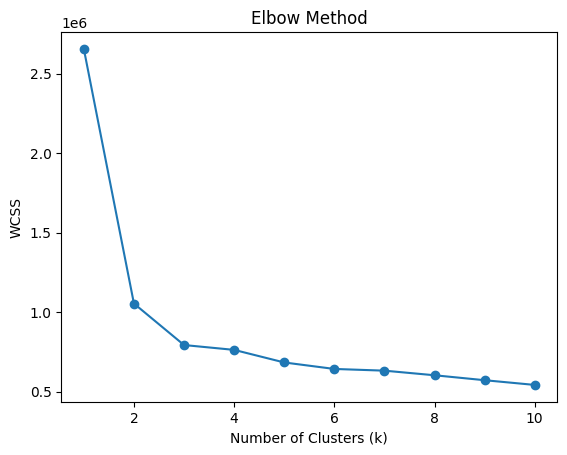

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# 1. Prepare data for clustering:
# Select the features for clustering (excluding 'Time' and 'trade_direction')
X = final_data.drop(columns=['Time', 'trade_direction'], axis=1)

# 2. Find optimal number of clusters using elbow method:
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Try k values from 1 to 10
    # Initialize KMeans with k-means++
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)  # Fit the model
    wcss.append(kmeans.inertia_)  # Append inertia to wcss list

# 3. Plot the elbow graph:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# 4. Choose the optimal k value from the elbow point in the graph
# and apply KMeans with that value to get cluster labels
# elbow point is at k=3:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_data['k_means_cluster'] = kmeans.fit_predict(X)

# Now 'final_data' has a new column 'k_means_cluster' with cluster assignments
final_data['k_means_cluster'].value_counts()


,count
k_means_cluster,
2,20319
1,12631
0,11338


EVALUATING THE CLUSTERING USING METRICS

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming your DataFrame is named 'final_data'
# and has a column named 'k_means_cluster' with cluster assignments

# 1. Prepare data for clustering (excluding 'Time', 'trade_direction', and cluster labels)
X = final_data.drop(columns=['Time', 'trade_direction', 'k_means_cluster'], axis=1)

# 2. Calculate silhouette score
silhouette_avg = silhouette_score(X, final_data['k_means_cluster'])
print(f"Silhouette Score(k_means): {silhouette_avg}")

# 3. Calculate Davies-Bouldin index
db_index = davies_bouldin_score(X, final_data['k_means_cluster'])
print(f"Davies-Bouldin Index(k_means): {db_index}")

Silhouette Score(k_means): 0.4599391258146693
Davies-Bouldin Index(k_means): 0.8913980030635001


PLOT OF THE DATA BASED ON THIER K_MEANS_CLUSTER_IDs


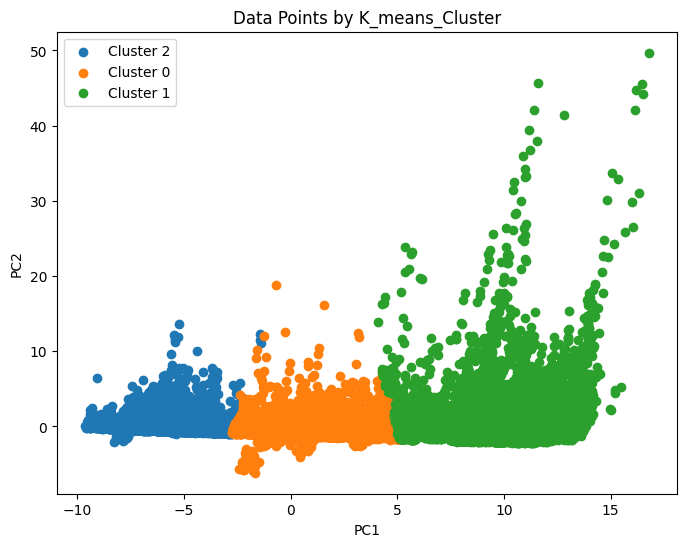

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'final_data'
# and has the specified columns

# 1. Prepare data for PCA (including all features)
X = final_data.drop(columns=['Time', 'trade_direction', 'k_means_cluster'], axis=1)
# Exclude columns that are not features

# 3. Apply PCA to select 2 components
pca = PCA(n_components=2)  # Select 2 principal components
principal_components = pca.fit_transform(X)

# 4. Create a DataFrame for principal components
pc_final_data = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# 5. Concatenate principal components with cluster labels
final_data_pca = pd.concat([final_data[['k_means_cluster']], pc_final_data], axis=1)

# 6. Plot the data points using PC1 and PC2, colored by cluster
plt.figure(figsize=(8, 6))
for cluster_id in final_data_pca['k_means_cluster'].unique():
    cluster_data = final_data_pca[final_data_pca['k_means_cluster'] == cluster_id]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_id}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data Points by K_means_Cluster')
plt.legend()
plt.show()

CLUSTERING USING GMM

In [ ]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named 'final_data'
# and has the specified columns

# 1. Prepare data for GMM (including all features)
X = final_data.drop(columns=['Time', 'trade_direction', 'k_means_cluster'], axis=1)
# Exclude columns that are not features

# 3. Initialize and fit the Gaussian Mixture Model
n_components = 3  # Specify the number of components (clusters)
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X)

# 4. Get soft probabilities (cluster assignments)
cluster_probs = gmm.predict_proba(X)

# 5. Add cluster probabilities to the DataFrame
final_data[['ClusterProb' + str(i) for i in range(n_components)]] = pd.DataFrame(cluster_probs)

# Now 'final_data' has new columns for cluster probabilities
print(final_data.head())

                        Time  trade_direction       B2A  imbalance_L1  \
0  2025-03-14 00:00:34+05:30               -1  0.500850      0.022841   
1  2025-03-14 00:00:38+05:30                0  0.500850     -1.413670   
2  2025-03-14 00:00:41+05:30                0  0.193420      0.102485   
3  2025-03-14 00:00:42+05:30               -1 -0.728867     -0.496215   
4  2025-03-14 00:00:48+05:30                0  0.193420     -0.499537   

   microprice  cum_bid_qty  cum_ask_qty  rolling_midprice_return  \
0   -1.124253    -0.132781     0.019246                -0.075010   
1   -1.131788    -0.206832    -0.099195                 0.611410   
2   -1.129278    -0.075857    -0.067727                 1.023256   
3   -1.130315     0.011105    -0.111495                -0.212302   
4   -1.131193     0.000231    -0.130295                -0.006385   

   volatility_10s  volatility_30s  ...  TradeWipeLevel_10s  \
0        0.066602        0.131583  ...           -0.195891   
1        0.079981        0.1

In [ ]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming your DataFrame is named 'final_data'
# and has columns for cluster probabilities (e.g., 'ClusterProb0', 'ClusterProb1', 'ClusterProb2')

# 1. Prepare data for clustering (excluding 'Time', 'trade_direction', and cluster probabilities)
X = final_data.drop(columns=['Time', 'trade_direction', 'ClusterProb0', 'ClusterProb1', 'ClusterProb2'], axis=1)

# 2. Get cluster assignments from GMM probabilities
gmm_cluster_labels = final_data[['ClusterProb0', 'ClusterProb1', 'ClusterProb2']].idxmax(axis=1)
gmm_cluster_labels = gmm_cluster_labels.map(lambda x: int(x[-1]))  # Extract cluster number

# 3. Calculate silhouette score for GMM clustering
silhouette_avg_gmm = silhouette_score(X, gmm_cluster_labels)
print(f"Silhouette Score (GMM): {silhouette_avg_gmm}")

# 4. Calculate Davies-Bouldin index for GMM clustering
db_index_gmm = davies_bouldin_score(X, gmm_cluster_labels)
print(f"Davies-Bouldin Index (GMM): {db_index_gmm}")

Silhouette Score (GMM): 0.07142787804630608
Davies-Bouldin Index (GMM): 3.217648761810558


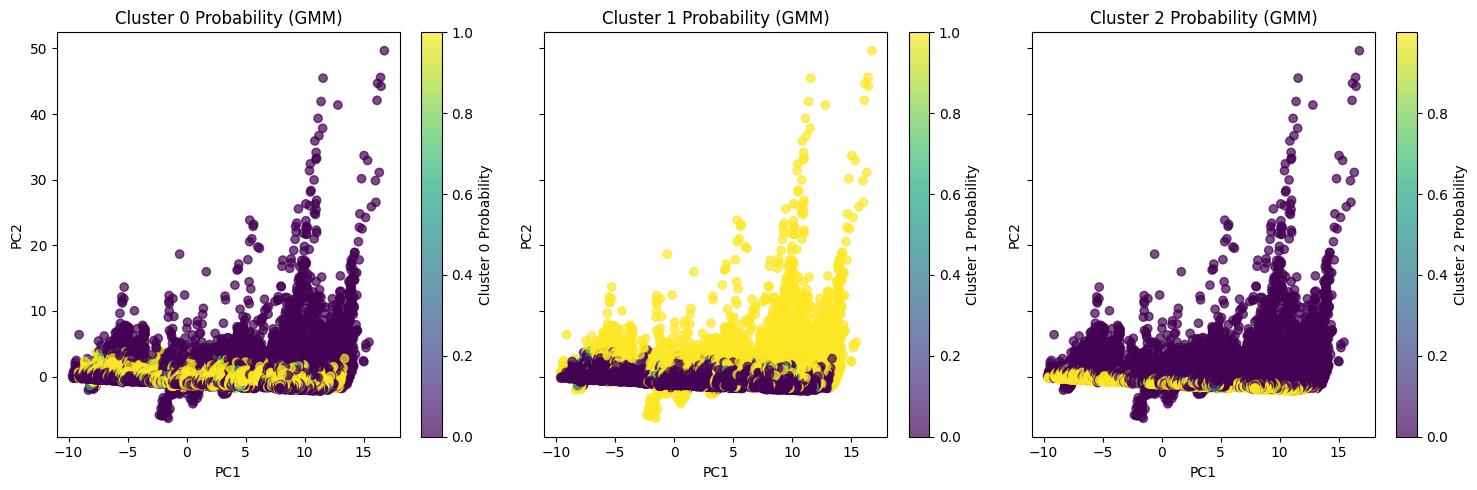

In [ ]:
# 6. Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)  # Reduce to 2 dimensions
principal_components = pca.fit_transform(X)
X[['PC_A', 'PC_B']] = pd.DataFrame(principal_components)

# 7. Visualize cluster probabilities using subplots
fig, axes = plt.subplots(1, n_components, figsize=(15, 5), sharex=True, sharey=True)
for i in range(n_components):
    axes[i].scatter(X['PC_A'], X['PC_B'],
                    c=final_data[f'ClusterProb{i}'], cmap='viridis', alpha=0.7)
    axes[i].set_xlabel('PC1')
    axes[i].set_ylabel('PC2')
    axes[i].set_title(f'Cluster {i} Probability (GMM)')
    # Add colorbar to each subplot
    cbar = fig.colorbar(axes[i].collections[0], ax=axes[i], orientation="vertical")
    cbar.set_label(f'Cluster {i} Probability')

plt.tight_layout()
plt.show()

#4. Regime Labeling and Analysis

ANALYSIS OF EACH REGIME


In [ ]:
import pandas as pd

# Group data by cluster ID
cluster_groups = final_data.groupby('k_means_cluster')

# Calculate metrics for each cluster with descriptive titles
# Use the original column names as keys:
cluster_metrics = cluster_groups.agg({
    'volatility_10s': 'mean',  # Average Volatility
    'B2A': 'mean',  # Typical Spread
    'imbalance_L1': 'mean',  # Liquidity (Imbalance Proxy)
    'trade_direction': lambda x: (x == 1).sum() / len(x)  # Buy Ratio (Directionality)
})

# Rename columns for clarity
cluster_metrics = cluster_metrics.rename(columns={
    'volatility_10s': 'Average Volatility',
    'B2A': 'Typical Spread',
    'imbalance_L1': 'Liquidity (Imbalance Proxy)',
    'trade_direction': 'Buy Ratio (Directionality)'
})

# Display the cluster metrics with descriptive titles
print(cluster_metrics)

                 Average Volatility  Typical Spread  \
k_means_cluster                                       
0                          0.070239        0.297135   
1                          0.089876        0.775810   
2                          0.057303       -0.648072   

                 Liquidity (Imbalance Proxy)  Buy Ratio (Directionality)  
k_means_cluster                                                           
0                                  -0.017548                    0.293350  
1                                  -0.006612                    0.375821  
2                                   0.013902                    0.275604  


ASSIGNING REGIME NAMES

In [ ]:
def assign_regime_names(row):
    if row['k_means_cluster'] == 0:
        return "Mean-Reverting & Moderately Volatile"
    elif row['k_means_cluster'] == 1:
        return "Trending & Volatile & Illiquid"
    elif row['k_means_cluster'] == 2:
        return "Stable & Liquid & Narrow Spread"
    else:
        return "Unknown"  # Handle any unexpected cluster values

# Apply the function to create a new 'regime' column
final_data['regime'] = final_data.apply(assign_regime_names, axis=1)

# Print the updated DataFrame (optional)
print(final_data[['k_means_cluster', 'regime']].head())

   k_means_cluster                           regime
0                2  Stable & Liquid & Narrow Spread
1                2  Stable & Liquid & Narrow Spread
2                2  Stable & Liquid & Narrow Spread
3                2  Stable & Liquid & Narrow Spread
4                2  Stable & Liquid & Narrow Spread


#5: Visualization (Good Informatic plots)


REGIME EVOLUTION PLOT

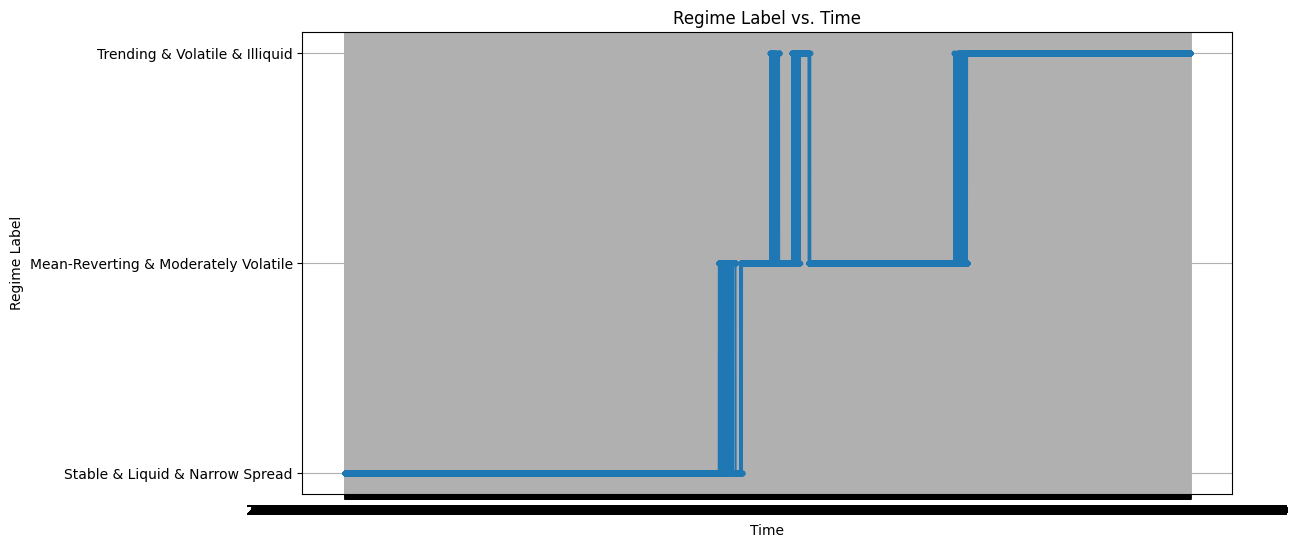

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'final_data' has columns 'Time' and 'regime'
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(final_data['Time'], final_data['regime'], marker='o', linestyle='-', markersize=3)
plt.title('Regime Label vs. Time')
plt.xlabel('Time')
plt.ylabel('Regime Label')
plt.yticks(final_data['regime'].unique())  # Set y-axis ticks to unique regime labels
plt.grid(True)
plt.show()

PRICE AND VOLATILITY PLOT

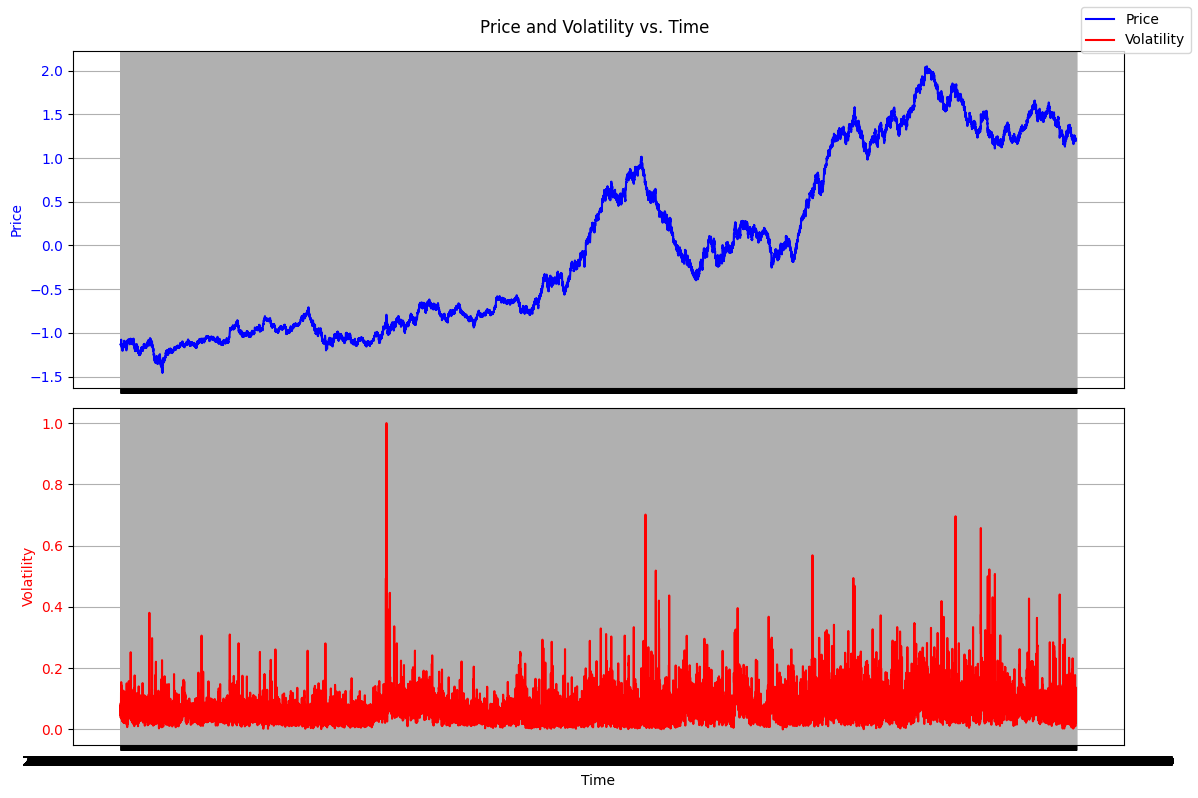

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'final_data' has columns 'Time', 'Price', and 'volatility_10s'
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)  # 2 rows, 1 column

# Plot Price vs. Time
ax1.plot(final_data['Time'], final_data['Price'], color='blue', label='Price')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Plot Volatility vs. Time
ax2.plot(final_data['Time'], final_data['volatility_10s'], color='red', label='Volatility')
ax2.set_ylabel('Volatility', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.grid(True)

# Set X-axis Label and Title
ax2.set_xlabel('Time')  # Only set x-label for the bottom subplot
plt.suptitle('Price and Volatility vs. Time')  # Overall title for the figure

# Add Legend
fig.legend(loc='upper right')  # Place legend in the upper right corner

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

In [ ]:
import pandas as pd
final_data=pd.read_csv("/content/drive/MyDrive/final_data.csv")
final_data

,Time,trade_direction,B2A,imbalance_L1,microprice,cum_bid_qty,cum_ask_qty,rolling_midprice_return,volatility_10s,volatility_30s,...,TradeWipeLevel_30s,Price,Quantity,TotalTrades,PC1,k_means_cluster,ClusterProb0,ClusterProb1,ClusterProb2,regime
0,2025-03-14 00:00:34+05:30,-1,0.500850,0.022841,-1.124253,-0.132781,0.019246,-0.075010,0.066602,0.131583,...,0.431023,-1.130044,0.032010,0.015654,-7.273876,2,1.493552e-19,1.000000e+00,0.000000e+00,Stable & Liquid & Narrow Spread
1,2025-03-14 00:00:38+05:30,0,0.500850,-1.413670,-1.131788,-0.206832,-0.099195,0.611410,0.079981,0.141072,...,0.769049,-1.130321,-0.245995,-0.522761,-7.315560,2,3.293022e-26,1.000000e+00,0.000000e+00,Stable & Liquid & Narrow Spread
2,2025-03-14 00:00:41+05:30,0,0.193420,0.102485,-1.129278,-0.075857,-0.067727,1.023256,0.074194,0.141825,...,0.516061,-1.129514,0.141359,0.150258,-7.299759,2,8.416095e-41,1.000000e+00,0.000000e+00,Stable & Liquid & Narrow Spread
3,2025-03-14 00:00:42+05:30,-1,-0.728867,-0.496215,-1.130315,0.011105,-0.111495,-0.212302,0.074225,0.135757,...,0.467369,-1.131290,-0.226844,-0.522761,-7.324884,2,3.675411e-45,1.000000e+00,0.000000e+00,Stable & Liquid & Narrow Spread
4,2025-03-14 00:00:48+05:30,0,0.193420,-0.499537,-1.131193,0.000231,-0.130295,-0.006385,0.038122,0.127490,...,-0.327384,-1.131774,-0.226844,-0.522761,-7.302297,2,7.681495e-01,2.318505e-01,2.663031e-308,Stable & Liquid & Narrow Spread
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44283,2025-03-17 23:58:44+05:30,0,-0.114009,-1.067245,1.204232,-0.180572,-0.137190,0.817378,0.054959,0.139268,...,-0.499845,1.204345,-0.212223,-0.320855,7.851324,1,9.136190e-07,3.858810e-18,9.999991e-01,Trending & Volatile & Illiquid
44284,2025-03-17 23:58:59+05:30,1,-0.114009,0.831418,1.219554,-0.100249,-0.164909,-0.006385,0.023435,0.054492,...,-0.524084,1.221664,-0.252873,-0.522761,7.944347,1,9.999998e-01,1.060209e-12,1.955983e-07,Trending & Volatile & Illiquid
44285,2025-03-17 23:59:02+05:30,-1,-0.114009,0.831418,1.219554,-0.269973,-0.219941,0.310291,0.029408,0.053262,...,-0.467377,1.214494,-0.103409,-0.186252,7.925096,1,5.100372e-07,6.569716e-18,9.999995e-01,Trending & Volatile & Illiquid
44286,2025-03-17 23:59:10+05:30,-1,0.193420,0.090219,1.218337,-0.206613,-0.152583,-0.133054,0.035706,0.045607,...,-0.513828,1.216335,-0.265682,-0.522761,7.919861,1,1.498904e-08,4.046564e-20,1.000000e+00,Trending & Volatile & Illiquid


DATA VISUALIZATION IN 2D USING TSNE

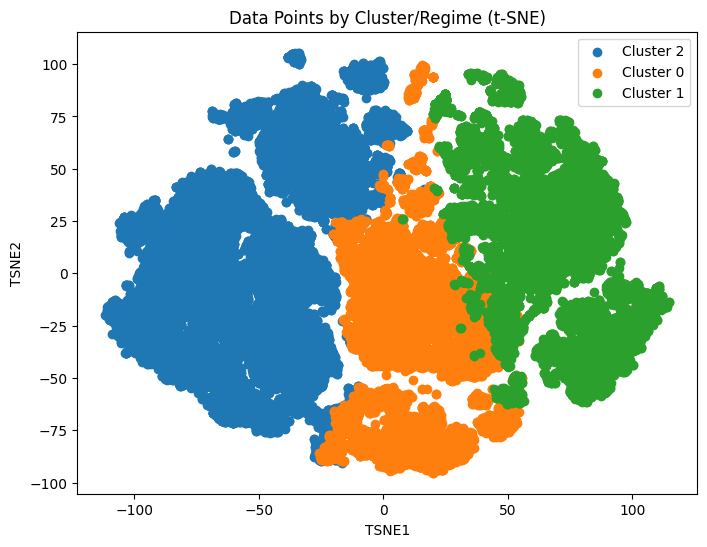

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'final_data'
# and has the specified columns

# 1. Prepare data for t-SNE (including all features)
X = final_data.drop(columns=['Time', 'trade_direction', 'k_means_cluster', 'regime'], axis=1)
# Exclude columns that are not features

# 2. Initialize and fit t-SNE
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
tsne_components = tsne.fit_transform(X)

# 3. Create a DataFrame for t-SNE components
tsne_final_data = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])

# 4. Concatenate t-SNE components with cluster labels or other relevant columns
final_data_tsne = pd.concat([final_data[['k_means_cluster', 'regime']], tsne_final_data], axis=1)

# 5. Plot the data points using TSNE1 and TSNE2, colored by cluster or regime
plt.figure(figsize=(8, 6))

# Color by cluster:
for cluster_id in final_data_tsne['k_means_cluster'].unique():
    cluster_data = final_data_tsne[final_data_tsne['k_means_cluster'] == cluster_id]
    plt.scatter(cluster_data['TSNE1'], cluster_data['TSNE2'], label=f'Cluster {cluster_id}')

# Or color by regime:
# for regime_name in final_data_tsne['regime'].unique():
#     regime_data = final_data_tsne[final_data_tsne['regime'] == regime_name]
#     plt.scatter(regime_data['TSNE1'], regime_data['TSNE2'], label=regime_name)

plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('Data Points by Cluster/Regime (t-SNE)')
plt.legend()
plt.show()

In [ ]:
final_data=pd.read_csv("/content/drive/MyDrive/final_data.csv")
final_data

,Time,trade_direction,B2A,imbalance_L1,microprice,cum_bid_qty,cum_ask_qty,rolling_midprice_return,volatility_10s,volatility_30s,...,TradeWipeLevel_30s,Price,Quantity,TotalTrades,PC1,k_means_cluster,ClusterProb0,ClusterProb1,ClusterProb2,regime
0,2025-03-14 00:00:34+05:30,-1,0.500850,0.022841,-1.124253,-0.132781,0.019246,-0.075010,0.066602,0.131583,...,0.431023,-1.130044,0.032010,0.015654,-7.273876,2,1.493552e-19,1.000000e+00,0.000000e+00,Stable & Liquid & Narrow Spread
1,2025-03-14 00:00:38+05:30,0,0.500850,-1.413670,-1.131788,-0.206832,-0.099195,0.611410,0.079981,0.141072,...,0.769049,-1.130321,-0.245995,-0.522761,-7.315560,2,3.293022e-26,1.000000e+00,0.000000e+00,Stable & Liquid & Narrow Spread
2,2025-03-14 00:00:41+05:30,0,0.193420,0.102485,-1.129278,-0.075857,-0.067727,1.023256,0.074194,0.141825,...,0.516061,-1.129514,0.141359,0.150258,-7.299759,2,8.416095e-41,1.000000e+00,0.000000e+00,Stable & Liquid & Narrow Spread
3,2025-03-14 00:00:42+05:30,-1,-0.728867,-0.496215,-1.130315,0.011105,-0.111495,-0.212302,0.074225,0.135757,...,0.467369,-1.131290,-0.226844,-0.522761,-7.324884,2,3.675411e-45,1.000000e+00,0.000000e+00,Stable & Liquid & Narrow Spread
4,2025-03-14 00:00:48+05:30,0,0.193420,-0.499537,-1.131193,0.000231,-0.130295,-0.006385,0.038122,0.127490,...,-0.327384,-1.131774,-0.226844,-0.522761,-7.302297,2,7.681495e-01,2.318505e-01,2.663031e-308,Stable & Liquid & Narrow Spread
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44283,2025-03-17 23:58:44+05:30,0,-0.114009,-1.067245,1.204232,-0.180572,-0.137190,0.817378,0.054959,0.139268,...,-0.499845,1.204345,-0.212223,-0.320855,7.851324,1,9.136190e-07,3.858810e-18,9.999991e-01,Trending & Volatile & Illiquid
44284,2025-03-17 23:58:59+05:30,1,-0.114009,0.831418,1.219554,-0.100249,-0.164909,-0.006385,0.023435,0.054492,...,-0.524084,1.221664,-0.252873,-0.522761,7.944347,1,9.999998e-01,1.060209e-12,1.955983e-07,Trending & Volatile & Illiquid
44285,2025-03-17 23:59:02+05:30,-1,-0.114009,0.831418,1.219554,-0.269973,-0.219941,0.310291,0.029408,0.053262,...,-0.467377,1.214494,-0.103409,-0.186252,7.925096,1,5.100372e-07,6.569716e-18,9.999995e-01,Trending & Volatile & Illiquid
44286,2025-03-17 23:59:10+05:30,-1,0.193420,0.090219,1.218337,-0.206613,-0.152583,-0.133054,0.035706,0.045607,...,-0.513828,1.216335,-0.265682,-0.522761,7.919861,1,1.498904e-08,4.046564e-20,1.000000e+00,Trending & Volatile & Illiquid


#6. Regime Change Insights


PROBABLITIES OF A PARTICULAR REGIME FOLLOWING OTHER REGIMES

In [ ]:
import pandas as pd

# Get current and next regime
final_data['next_regime'] = final_data['regime'].shift(-1)

# Drop the last row (no next regime)
final_data_transitions = final_data.dropna(subset=['next_regime'])

# Count transitions
transition_counts = final_data_transitions.groupby(['regime', 'next_regime']).size().unstack(fill_value=0)

# Normalize to get transition probabilities
transition_probs = transition_counts.div(transition_counts.sum(axis=1), axis=0)

# Optional: round for readability
transition_probs = transition_probs.round(3)

# Display transition probability matrix
print("📊 Regime Transition Probability Matrix:\n")
print(transition_probs)


📊 Regime Transition Probability Matrix:

next_regime                           Mean-Reverting & Moderately Volatile  \
regime                                                                       
Mean-Reverting & Moderately Volatile                                 0.990   
Stable & Liquid & Narrow Spread                                      0.003   
Trending & Volatile & Illiquid                                       0.005   

next_regime                           Stable & Liquid & Narrow Spread  \
regime                                                                  
Mean-Reverting & Moderately Volatile                            0.005   
Stable & Liquid & Narrow Spread                                 0.997   
Trending & Volatile & Illiquid                                  0.000   

next_regime                           Trending & Volatile & Illiquid  
regime                                                                
Mean-Reverting & Moderately Volatile                        